# Data Science Technical Assessment

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("C:/Users/MOSHOOD/Desktop/bestsellers with categories.csv")

In [3]:
data.head(10)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
5,A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,12643,11,2011,Fiction
6,A Game of Thrones / A Clash of Kings / A Storm...,George R. R. Martin,4.7,19735,30,2014,Fiction
7,A Gentleman in Moscow: A Novel,Amor Towles,4.7,19699,15,2017,Fiction
8,"A Higher Loyalty: Truth, Lies, and Leadership",James Comey,4.7,5983,3,2018,Non Fiction
9,A Man Called Ove: A Novel,Fredrik Backman,4.6,23848,8,2016,Fiction


In [4]:
# Check for missing values
data.isnull().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [6]:
data.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


In [7]:
data.describe(include='object')

,Name,Author,Genre
count,550,550,550
unique,351,248,2
top,Publication Manual of the American Psychologic...,Jeff Kinney,Non Fiction
freq,10,12,310


# Visualization

1. The best selling books of the decade.

In [8]:
data.Name.value_counts().head(30)

Publication Manual of the American Psychological Association, 6th Edition                 10
StrengthsFinder 2.0                                                                        9
Oh, the Places You'll Go!                                                                  8
The 7 Habits of Highly Effective People: Powerful Lessons in Personal Change               7
The Very Hungry Caterpillar                                                                7
Jesus Calling: Enjoying Peace in His Presence (with Scripture References)                  6
The Four Agreements: A Practical Guide to Personal Freedom (A Toltec Wisdom Book)          6
The 5 Love Languages: The Secret to Love That Lasts                                        5
Wonder                                                                                     5
Unbroken: A World War II Story of Survival, Resilience, and Redemption                     5
First 100 Words                                                       

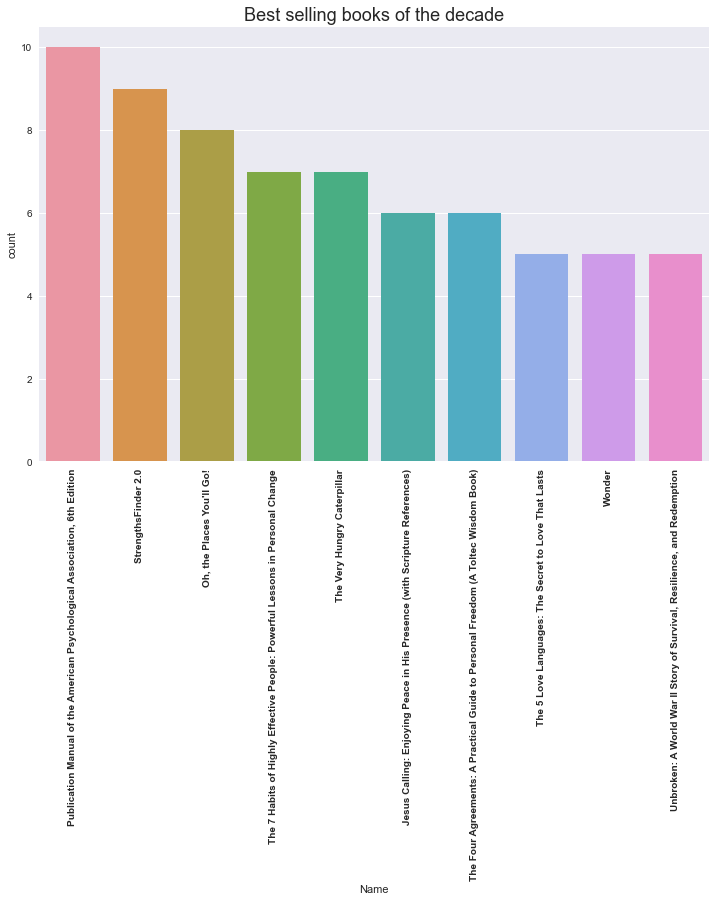

In [17]:
plt.figure(figsize=(12,8))
sns.countplot(data=data, x = 'Name', order = data.Name.value_counts().iloc[:10].index)
plt.xticks(rotation = 90,weight='bold',size = 10)
plt.title('Best selling books of the decade', fontsize=18)
plt.show()

2. The percentage of fiction to non-fiction.

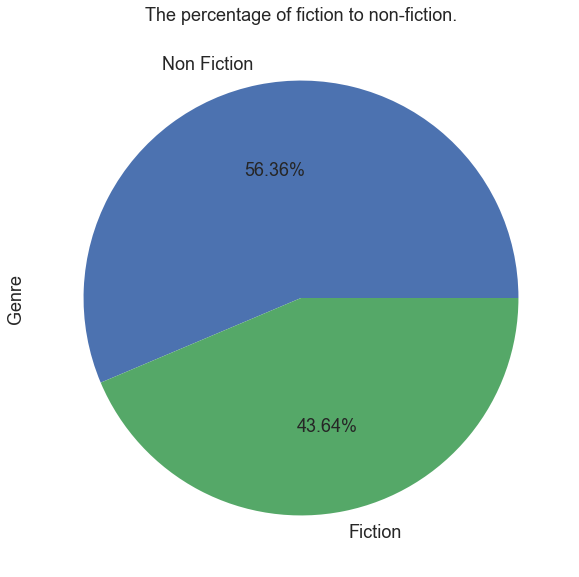

In [16]:
fig, ax = plt.subplots()
data.Genre.value_counts().plot.pie(autopct='%0.2f%%',figsize=(10,10),fontsize=18)
plt.title('The percentage of fiction to non-fiction.', fontsize=18)
ax.set_ylabel("Genre", fontsize=18)
plt.show()

3. Trend over the years


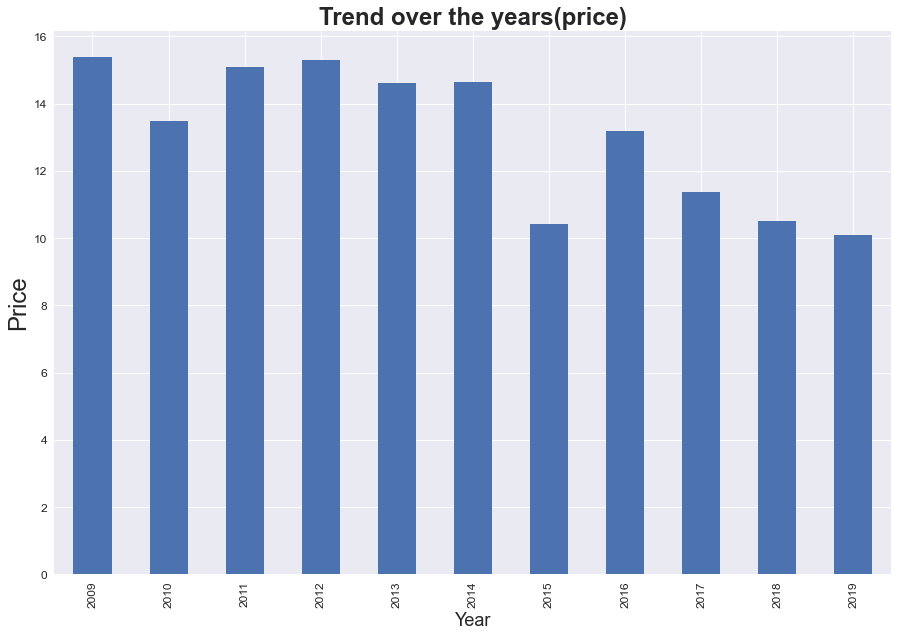

In [15]:
fig,ax = plt.subplots(figsize=(15,10))
data.groupby('Year').Price.mean().plot.bar()
plt.title('Trend over the years(price)',fontsize=24, weight='bold')
ax.set_xlabel("Year", fontsize=18)
ax.set_ylabel('Price',fontsize=24)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.show()

4. Top 10 Authors according to reviews

In [12]:
data[['Author','Reviews']].sort_values(by=['Reviews'],ascending=False).head(10)

,Author,Reviews
534,Delia Owens,87841
382,Paula Hawkins,79446
383,Paula Hawkins,79446
32,Michelle Obama,61133
33,Michelle Obama,61133
137,Gillian Flynn,57271
135,Gillian Flynn,57271
136,Gillian Flynn,57271
368,John Green,50482
367,John Green,50482


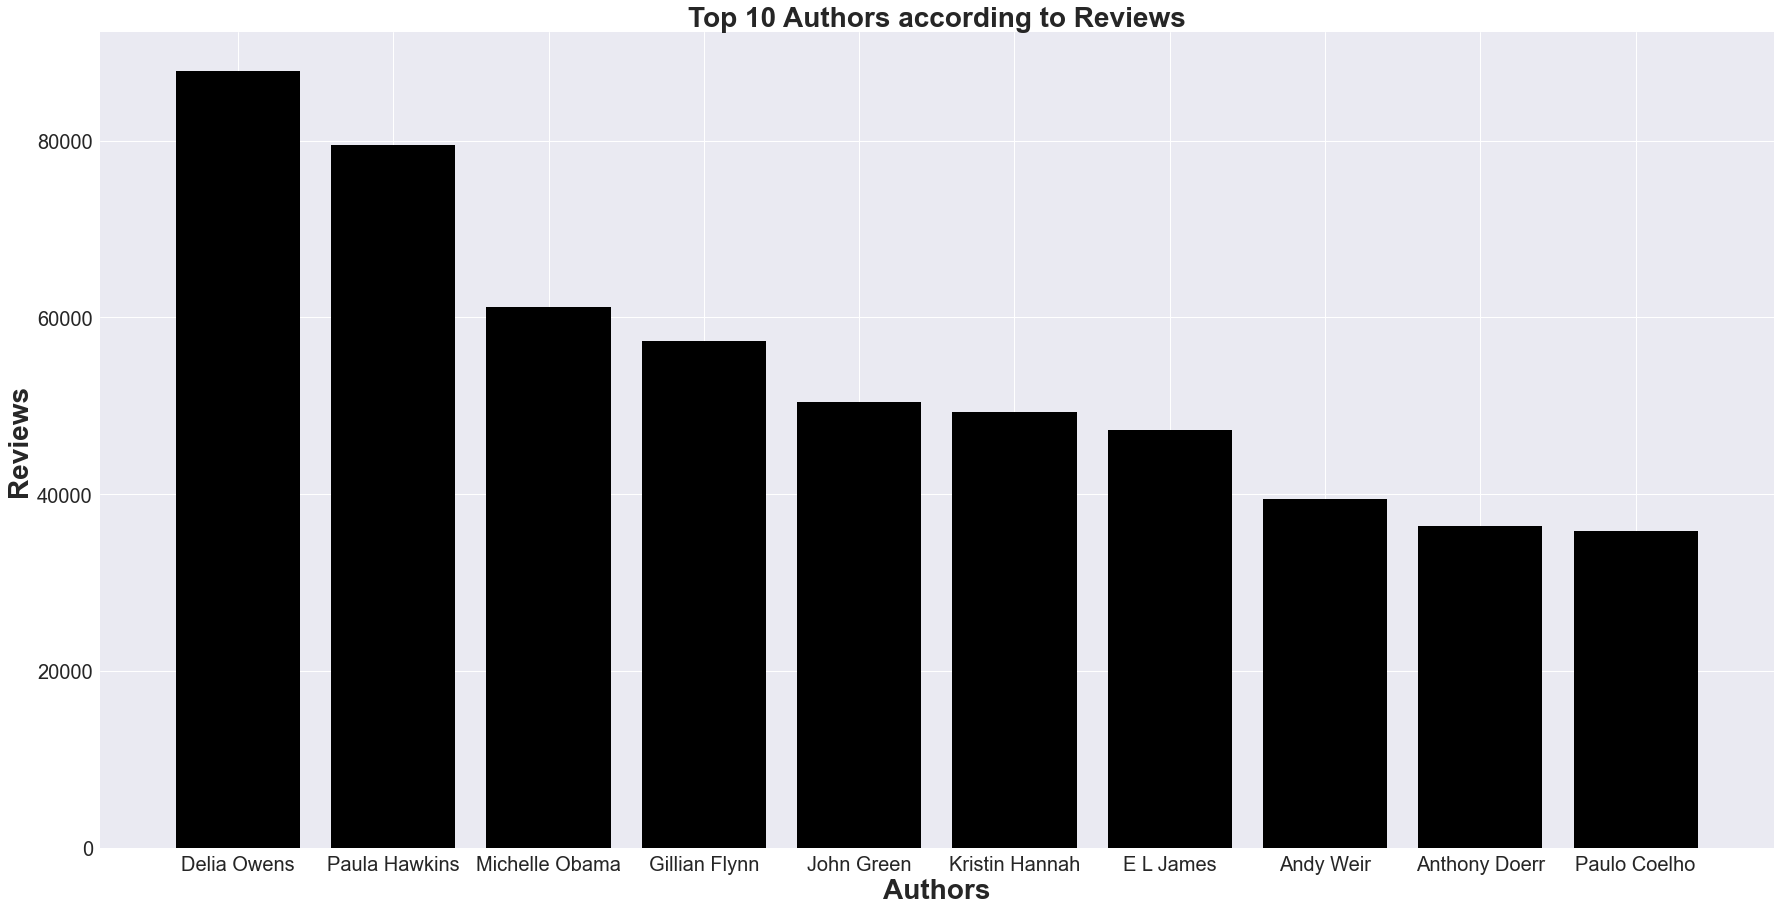

In [19]:
df = pd.DataFrame(data[['Author','Reviews']].sort_values(by=['Reviews'],ascending=False).iloc[:20])
fig,ax = plt.subplots(figsize=(30,15))
plt.style.use('seaborn')
ax.bar(df.Author,df.Reviews, color='black')
ax.set_xlabel('Author',fontsize=24)
ax.set_ylabel('Reviews',fontsize=24)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.title('Top 10 Authors according to Reviews', fontsize=28, weight='bold')
ax.set_xlabel('Authors', fontsize=28, weight='bold')
ax.set_ylabel('Reviews', fontsize=28, weight='bold')
plt.show()